# Thử làm model phân khúc khách hàng bằng RFM và KMean - Mì AI

link: https://www.youtube.com/watch?v=I3Oo__t_mks

In [1]:
# Import thu vien
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


ta tiến hành lấy 1 phần dữ liệu mà ko có giá trị NaN

In [17]:
df_not_nan = df[df['CustomerID'].notna()] # cot customerid có nhiều giá trị null 
df_not_nan = df_not_nan.sample(10000, random_state=42)
df_not_nan.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom
234751,557598,22558,CLOTHES PEGS RETROSPOT PACK 24,2,2011-06-21 11:33:00,1.65,14667.0,United Kingdom
283269,561704,21533,RETROSPOT LARGE MILK JUG,1,2011-07-29 11:07:00,4.95,14606.0,United Kingdom
532936,581001,22726,ALARM CLOCK BAKELIKE GREEN,24,2011-12-07 08:07:00,3.75,12583.0,France
78561,542890,84865,NEW BAROQUE BLACK PHOTO ALBUM,2,2011-02-01 13:25:00,8.50,15311.0,United Kingdom
424855,573287,21314,SMALL GLASS HEART TRINKET POT,8,2011-10-28 14:42:00,2.10,14194.0,United Kingdom


In [21]:
# tinh toan RFM

# Tinh R -Rencency
#chuyen tu string ->date
df_not_nan['InvoiceDate'] = pd.to_datetime(df_not_nan['InvoiceDate'],format='%Y-%m-%d %H:%M:%S')

In [24]:
import datetime
#lay ngay lon nhat trong invoicedate + 1
import datetime
current_date = max(df_not_nan['InvoiceDate']) + datetime.timedelta(days=1)

In [25]:
current_date

Timestamp('2011-12-10 12:16:00')

In [26]:
# -------- Tinh M - MoneytaryValue
df_not_nan['TotalPay'] = df_not_nan['Quantity'] * df_not_nan['UnitPrice']

In [28]:
#group by customer de tinh R,F,M

df_customers = df_not_nan.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date - x.max()).days,
      'InvoiceNo':'count',
    'TotalPay':'sum'
    }
)
                                            

In [29]:
df_customers.head()

,InvoiceDate,InvoiceNo,TotalPay
CustomerID,,,
12347.0,39,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,72,5,80.85
12354.0,232,2,33.30


In [30]:
df_customers.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPay':'MonetaryValue'}, inplace=True)

In [31]:
df_customers.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,39,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,72,5,80.85
12354.0,232,2,33.30


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

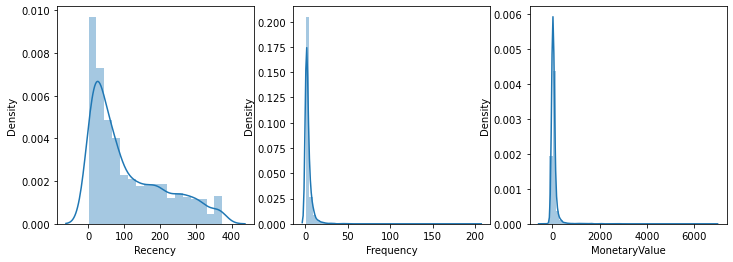

In [36]:
# Ve phan phoi de kiem tra
fig, ax=plt.subplots(1, 3 ,figsize=(12,4))
sns.distplot(df_customers['Recency'],ax=ax[0])
sns.distplot(df_customers['Frequency'],ax=ax[1])
sns.distplot(df_customers['MonetaryValue'],ax=ax[2])
plt.show()

ta thay rang phan phoi cua cac hinh ve deu dang bi lech 

In [46]:

from scipy import stats
def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.distplot(df_customers[x], ax=ax[0,0])
    sns.distplot(np.log(df_customers[x]), ax=ax[0,1])
    sns.distplot(np.sqrt(df_customers[x]), ax=ax[1,0])
    sns.distplot(stats.boxcox(df_customers[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(df_customers[x].skew().round(2))
    print(np.log(df_customers[x]).skew().round(2))
    print(np.sqrt(df_customers[x]).skew().round(2))
    print(pd.Series(stats.boxcox(df_customers[x])[0]).skew().round(2))

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

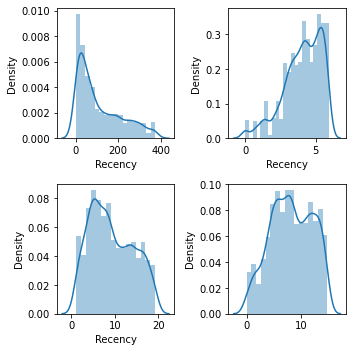

0.93
-0.83
0.31
-0.11


In [50]:
analyze_skewness('Recency')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

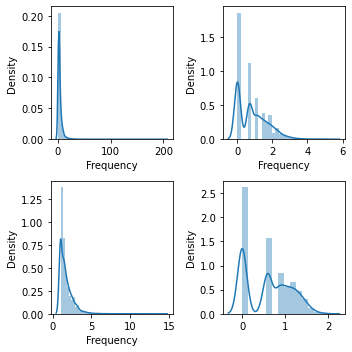

14.77
0.85
3.67
0.16


In [49]:
analyze_skewness('Frequency')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered 

ValueError: Data must be positive.

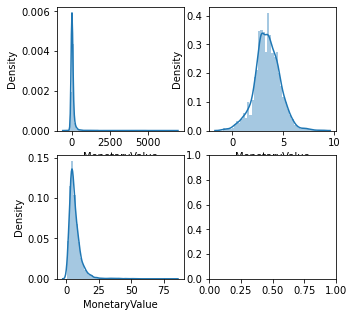

In [51]:
analyze_skewness('MonetaryValue')

In [52]:
df_customers_t = pd.DataFrame()
df_customers_t['Recency'] = stats.boxcox(df_customers['Recency'])[0]
df_customers_t['Frequency'] = stats.boxcox(df_customers['Frequency'])[0]
df_customers_t['MonetaryValue'] = pd.Series(np.cbrt(df_customers['MonetaryValue'])).values
df_customers_t.head(10)

,Recency,Frequency,MonetaryValue
0,6.285050,1.127547,5.107026
1,12.822038,0.591193,4.944452
2,4.514540,0.591193,6.787853
3,8.093846,1.127547,4.324076
4,12.507538,0.591193,3.217225
5,5.842330,1.017445,6.681810
6,10.722280,0.000000,4.308869
7,7.368815,0.857267,3.794637
8,9.629931,0.857267,3.220442
9,6.617486,0.000000,2.571282


In [53]:
# Tien hanh scale du lieu

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_customers_t)

df_customers_t = scaler.transform(df_customers_t)

In [54]:
df_customers_t 

array([[-0.49691277,  1.01242554,  1.01750301],
       [ 1.23459337, -0.01741182,  0.92511465],
       [-0.96588266, -0.01741182,  1.97269038],
       ...,
       [-0.9975698 , -0.01741182, -2.83326622],
       [-1.71559842,  1.94900123,  0.54365651],
       [-0.42586316,  0.80102263,  0.43798027]])

In [55]:
pd.DataFrame(df_customers_t).head()

,0,1,2
0,-0.496913,1.012426,1.017503
1,1.234593,-0.017412,0.925115
2,-0.965883,-0.017412,1.972690
3,-0.017802,1.012426,0.572565
4,1.151289,-0.017412,-0.056441


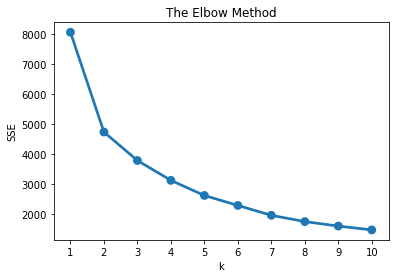

In [56]:
# Dua du lieu vao KNN

# Chọn số cụm bằng Elbow
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_customers_t)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [57]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(df_customers_t)

KMeans(n_clusters=3, random_state=42)

In [58]:
df_customers['Cluster'] = model.labels_
df_customers.head()

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,39,5,133.20,0
12348.0,249,2,120.88,2
12349.0,19,2,312.75,0
12352.0,72,5,80.85,0
12354.0,232,2,33.30,2


In [59]:
df_customers.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'MonetaryValue':'mean'
    }
).round(2)

,Recency,Frequency,MonetaryValue
Cluster,,,
0,45.59,7.71,165.79
1,46.88,1.61,21.51
2,226.54,1.64,28.70


# Training Rainfall Prediction Model with Different Models

link : https://thecleverprogrammer.com/2020/09/11/rainfall-prediction-with-machine-learning/